1.To Predict the percentage of an student based on the no. of study hours.This is a simple linear regression task as it involves just two variables.

To perform this task we require some libraries.So import them

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

Read the dataset

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)


In [4]:
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [5]:
# Now shape of dataset 
data.shape

(25, 2)

In [10]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Visualization techniques


# •PLOT GRAPH

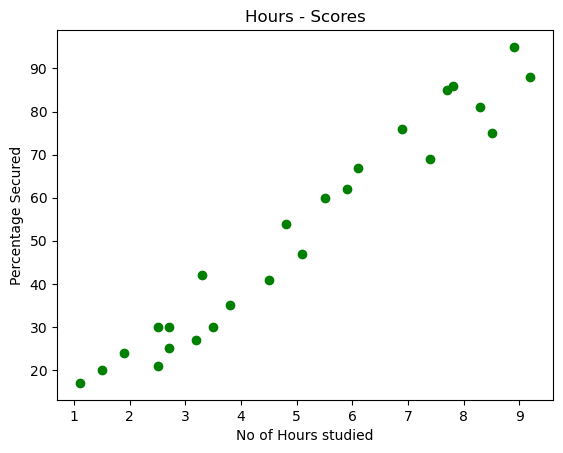

In [14]:
plt.scatter(data['Hours'], data['Scores'], color='green',marker='o')
plt.title("Hours - Scores")
plt.xlabel("No of Hours studied")
plt.ylabel("Percentage Secured")
plt.show()

Text(0.5, 1.0, 'Plotting the regression line')

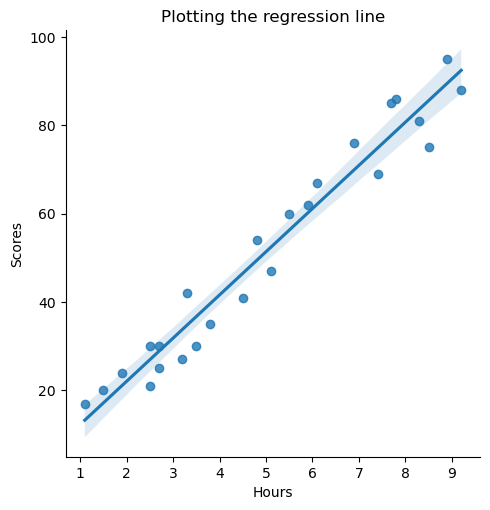

In [16]:
sns.lmplot(x="Hours",y="Scores", data=data)
plt.title("Plotting the regression line")


# Linear Regression -Training the data

In [19]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

In [21]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training has done")


Training has done


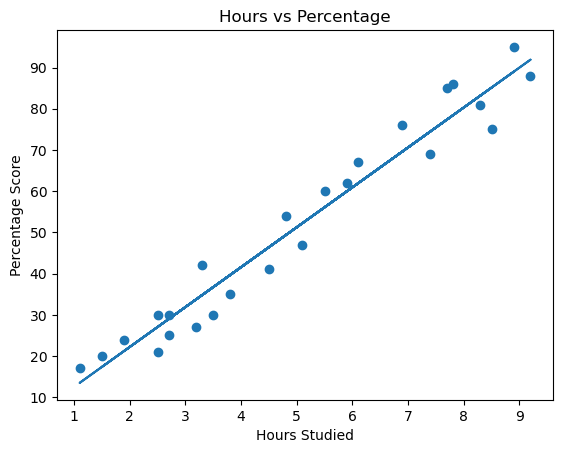

In [22]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# Testing the Model

In [23]:
print('Test Score is:')
print(regressor.score(X_test, y_test))
print('Training Score is :')
print(regressor.score(X_train, y_train))

Test Score
0.9678055545167994
Training Score
0.9491209376364416


In [24]:
y_test


array([81, 30, 21, 76, 62], dtype=int64)

In [25]:
y_predict

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [26]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict[:5]})
data

,Actual,Predicted
0,81,28.968503
1,30,34.777750
2,21,52.205491
3,76,39.618789
4,62,17.350010


In [27]:
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 1404.2200673968694
Mean absolute Error: 33.80918778157651
